In [18]:
from Bio import SeqIO

# family = "Pieridae"


location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/22.Busco_related/5.Checking_busco_aligned/"

alignment_file = SeqIO.parse(f"{location}/1.Timeless_1422at7088.txt", 'fasta')
output = ''
for records in alignment_file:
    output += records.id+ ","
    gap_start = 0
    for i in range(len(records.seq)):
        if records.seq[i] == "-" and gap_start == 0:
            output += f"{i+1}-"
            gap_start = 1
        if gap_start == 1 and records.seq[i] != "-":
            output += f"{i+1},"
            gap_start = 0
    if gap_start == 1:   
        output += f"{i+1}\n"
    else:
        output =output[:-1]+"\n"
    
print(output)
with open(f"{location}/gap_position.txt", 'w') as out_file:
    out_file.write(output)

busco_Papilio_xuthus,3838-3840
tim_Papilio_xuthus
busco_Colias_eurytheme,3245-3278,3724-3726
tim_Colias_eurytheme
busco_Colias_croceus,3226-3259,3715-3717
tim_Colias_croceus
busco_Zerene_cesonia,1034-1073,3240-3288,3736-3738
tim_Zerene_cesonia
busco_Eurema_hecabe,3748-3750
tim_Eurema_hecabe
busco_Pieris_mannii,3613-3615
tim_Pieris_mannii,3429-3432
busco_Pieris_rapae,3595-3597
tim_Pieris_rapae,3411-3414
busco_Pieris_melete,3574-3576
tim_Pieris_melete,3390-3393
busco_Pieris_napi,3571-3573
tim_Pieris_napi,3387-3390
busco_Pieris_brassicae,3586-3588
tim_Pieris_brassicae
busco_Leptophobia_aripa,3601-3603
tim_Leptophobia_aripa,3423-3426
busco_Aporia_crataegi,3658-3660
tim_Aporia_crataegi,3477-3480
busco_Anthocharis_cardamines,1036-1054,3246-3264,3703-3711
tim_Anthocharis_cardamines,2355-2391,3525-3528
busco_Leptidea_juvernica,1-10,1063-1096,3589-3591
tim_Leptidea_juvernica,812-821
busco_Papilio_glaucus,3676-3678
tim_Papilio_glaucus,3222-3225
busco_Papilio_elwesi,3286-3289,3673-3675
tim_Papili

In [19]:
import os
def determine_species_group(species_name, list_of_species_groups, location):
    import os

    for group_name in list_of_species_groups:
        list_of_species = os.listdir(f"{location}/{group_name}/1.Blast_result")
        if species_name in list_of_species:
            return(group_name)

from Bio import SeqIO
# family = "Lycaenidae"
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/"
# location = ""

# list_of_species_groups = ["3.Satyrine","4.Pierinae","5.Coliadinae","6.Heliconiinae_Danainae_Nymphalinae","7.Papilionidae","8.Lycaenidae"]

alignment_file = SeqIO.parse(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/22.Busco_related/5.Checking_busco_aligned/1.Timeless_1422at7088.txt", 'fasta')
output = ''
for records in alignment_file:
    
    species = "_".join(records.id.split("_")[1:])
    gene_folders_list = ["7.Timeless Exon Analysis"]
    # gene_folders_list = ["6.Period Exon Analysis"]
    
    for gene_folder in gene_folders_list:
        list_of_folders_in_gene_folder = os.listdir(f"{location}/{gene_folder}")
        list_of_species_groups = []
        
        if "3.MAFFT_output_check.txt" in list_of_folders_in_gene_folder:
            list_of_folders_in_gene_folder.remove("3.MAFFT_output_check.txt")
        
        for famliy_specific_test_folder in list_of_folders_in_gene_folder:
            try:
                if int(famliy_specific_test_folder.split(".")[0]) >2 and int(famliy_specific_test_folder.split(".")[0]) <11:
                    list_of_species_groups.append(famliy_specific_test_folder)
            except:
                pass
       
        for famliy_specific_test_folder in list_of_folders_in_gene_folder:
            if famliy_specific_test_folder.startswith("12.Family_specific_tests_"):
    
                group_name = determine_species_group(species, list_of_species_groups, f"{location}/{gene_folder}")
                exon_dictionary = {}
                with open(f"{location}/{gene_folder}/{group_name}/1.Blast_result/{species}/final_coordinates.csv", 'r') as coordinate_file:
                    coordinate_list = coordinate_file.readlines()
                    # print(coordinate_list)
                
    
                for i in range(1,len(coordinate_list)):
                    coordinate_split = coordinate_list[i].split(",")
                    if coordinate_split[5] == "N":
                        exon_start,exon_stop = int(coordinate_split[2]),int(coordinate_split[3])
                    else:
                        exon_start,exon_stop = 0,0
                    exon_dictionary[i] = int((exon_stop-exon_start))
                # print(exon_dictionary)
    
                pos_counter = 0
                seq_counter = 0
                output += records.id
                
                # if "_" in gene_folder:
                #     output += f'{gene_folder.split("_")[0].split(".")[1].lower()}'
                # else:
                #     output += f'{gene_folder.split(" ")[0].split(".")[1].lower()}'
    
                # list_of_files = os.listdir(f"{location}/{gene_folder}/{famliy_specific_test_folder}/{family}")
                # for fasta_file_name in list_of_files:
                #     if fasta_file_name.endswith("_nostop.fas"):
                #         fasta_file= SeqIO.parse(f"{location}/{gene_folder}/{famliy_specific_test_folder}/{family}/{fasta_file_name}", 'fasta')
                #         for records in  fasta_file:
                #             if species in records.id:
                                # translated_sequence = records.seq.translate()
                            
    
                
                for key,value in exon_dictionary.items():
                    output +=f",{pos_counter+1}-" 
                    exon_length = (seq_counter + int(value)+1)
                    # print(output, f"Exon_{key}", exon_length)
                    while pos_counter < len(records.seq):
                        
                        pos_counter += 1
                        # print(records.seq[pos_counter-1],pos_counter,seq_counter)
                        if records.seq[pos_counter-1] != "-":
                            seq_counter += 1
                            # print(records.seq[pos_counter-1],seq_counter)
                        if seq_counter == exon_length:
                            output += f"{pos_counter}"
                            break
                    
                        
            
                if output[-1] == "-":
                    output += f"{pos_counter}"
                output += "\n"
    # print(output)
    # assert False
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/22.Busco_related/5.Checking_busco_aligned/exon_positions.txt", 'w') as out_file:
    out_file.write(output)


3840.0
{'busco_Papilio_xuthus': Seq('atggaatgggttctcagaagccctcagctccatagcacattcagcaatcttgga...---'), 'tim_Papilio_xuthus': Seq('atggaatgggttctcagaagccctcagctccatagcacattcagcaatcttgga...tga'), 'busco_Colias_eurytheme': Seq('atggagtgggttcttaggggacctcagattcatagtacattcagtagtcttgga...---'), 'tim_Colias_eurytheme': Seq('atggagtgggttcttaggggacctcagattcatagtacattcagtagtcttgga...tga'), 'busco_Colias_croceus': Seq('atggagtgggttcttaggggacctcagattcatagtacattcagtaatcttgga...---'), 'tim_Colias_croceus': Seq('atggagtgggttcttaggggacctcagattcatagtacattcagtaatcttgga...tga'), 'busco_Zerene_cesonia': Seq('atggagtgggttcttaggggaccgcagattcatagtacattcagtaatcttgga...---'), 'tim_Zerene_cesonia': Seq('atggagtgggttcttaggggaccgcagattcatagtacattcagtaatcttgga...tga'), 'busco_Eurema_hecabe': Seq('atggagtgggttcttcggggaccacagatacatagcacattcagcgatcttgga...---'), 'tim_Eurema_hecabe': Seq('atggagtgggttcttcggggaccacagatacatagcacattcagcgatcttgga...taa'), 'busco_Pieris_mannii': Seq('atggagtgggttctgcggggtcctcagattcacagcacattc

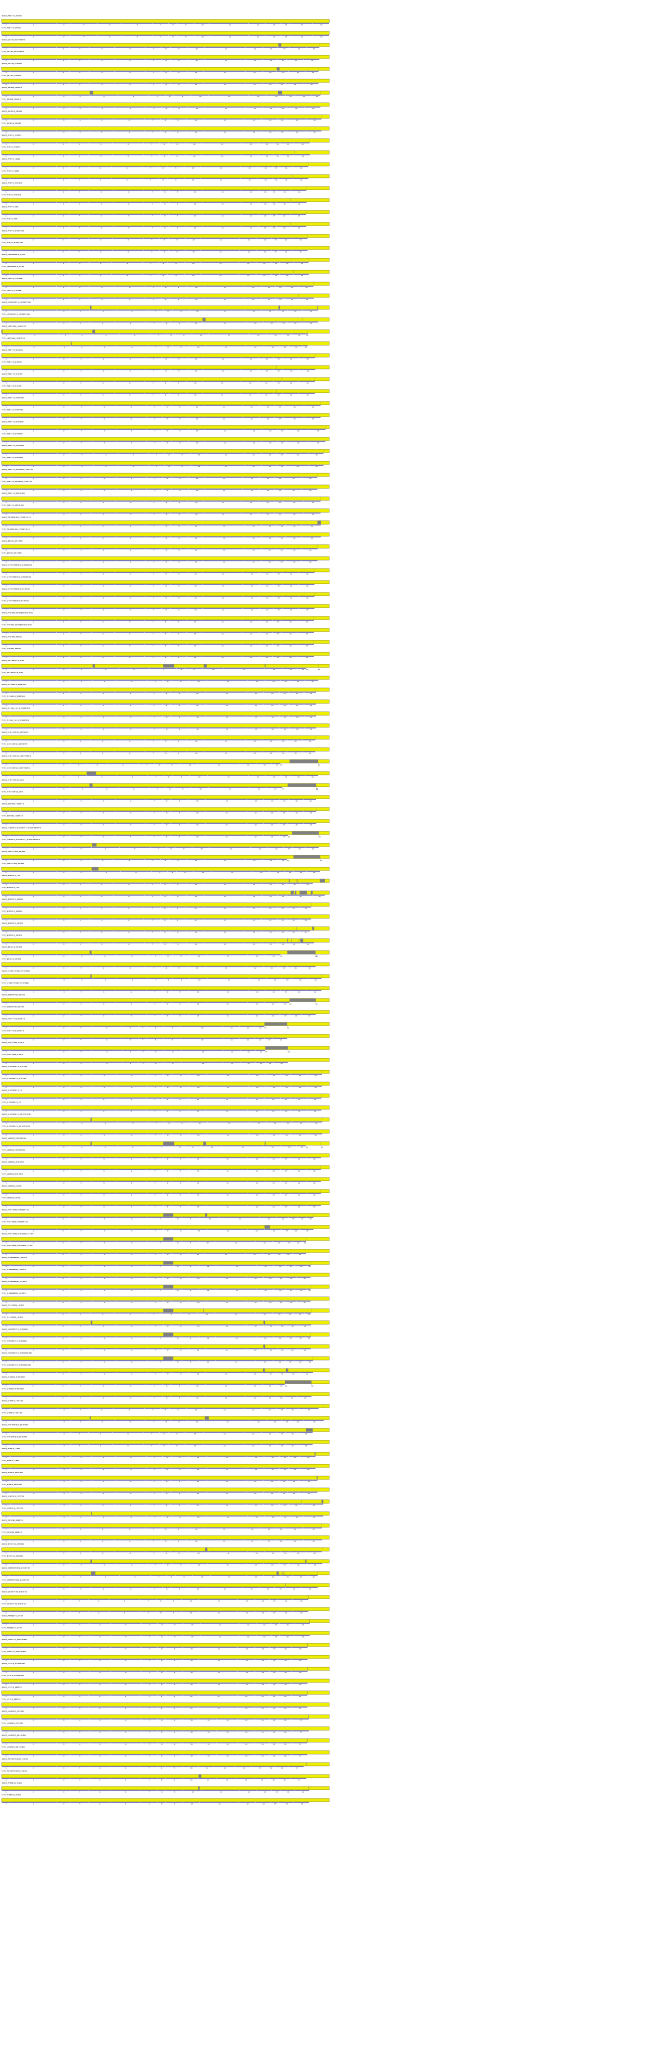

In [23]:
import drawsvg as draw
from Bio import SeqIO
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/6.Period Exon Analysis/12.Family_specific_tests/"
location1 = "/mnt/g/My Drive/Circadian Rhythm Genes Project/22.Busco_related/5.Checking_busco_aligned"
length_factor = 1
fasta_file = SeqIO.parse(f"{location1}/1.Timeless_1422at7088.txt", 'fasta')
species_sequence_dic = {}
total_length = 0
for record in fasta_file:
    current_length = len(record.seq)/length_factor
    if current_length > total_length:
        total_length = current_length
    species_sequence_dic[record.id] = record.seq
    # break

color_dictionary = {"G":"#EBEBEB","H":"#8282D2","P":"#DC9682","A":"#C8C8C8","W":"#B45AB4","S":"#FA9600","T":"#FA9600","V":"#0F820F","I":"#0F820F","L":"#0F820F","F":"#3232AA","Y":"#3232AA","C":"#E6E600","M":"#E6E600","D":"#E60A0A","E":"#E60A0A","N":"#00DCDC","Q":"#00DCDC","K":"#145AFF","R":"#145AFF","-":"#BEA06E"}
print(total_length)
# total_length = 1947
print(species_sequence_dic)

species_list = [key for key,value in species_sequence_dic.items()]
print(species_list)


with open(f"{location1}/gap_position.txt", 'r') as gap_file:
    gap_list = gap_file.readlines()
# with open(f"{location1}/3.For_drawing/1.Period/pfam_results_position_fixed.txt", 'r') as domain_file:
#     domain_list = domain_file.readlines()
with open(f"{location1}/exon_positions.txt", 'r') as exons_file:
    exons_list = exons_file.readlines()

d = draw.Drawing(total_length, 80*len(gap_list))    

for species_number in range(1,len(species_list)+1):
    species_name = species_list[species_number-1]
    # print(species_name)

    for gap_line in range(len(gap_list)):
        
        dm = gap_list[gap_line].strip().split(",")
        
        if dm[0] == species_name:
            # print(dm[0])
            d.append(draw.Lines(10, 20*(species_number+1) + 50*(species_number) + 20,
                                 10+(total_length/10)*5, 20*(species_number+1)+ 50*(species_number) + 20,
                                10+(total_length/10)*5,20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                10,20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                close=True,
                        fill='#eeee00',
                        stroke='black'))
            d.append(draw.Text(dm[0], 12, 10, 20*(species_number+1)-18+ 50*(species_number) + 20))
            length = round((total_length)/100)
 
            # for domain_line in domain_list:
            #     if dm[0] in domain_line:
            #         domain_line_split = domain_line.strip().split("\t")
                
            #         start, stop = int(domain_line_split[6])*3/length_factor, int(domain_line_split[7])*3/length_factor
                    
            #         d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
            #                    10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
            #                    10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
            #                    10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
            #                    close = True,
            #                    fill = "#AA336A"))
            #         d.append(draw.Text(f"{domain_line_split[5]}", 10, 10+((start-1)*.5), -5 + 20*(species_number+1)+ 50*(species_number) + 20))
               
            
            for i in range(1,len(dm)):
                # print(dm[i])
                start,stop = int(dm[i].split("-")[0])/length_factor,int(dm[i].split("-")[1])/length_factor
                d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   close = True,
                                   fill = "#808080"))
           
            for exon_line in exons_list:
                # print(species_name)
                if dm[0] in exon_line:
                    exon_line_split = exon_line.strip().split(",")
                    # print(exon_line_split)
                    exon_counter = 1
                    for i in range (1, len(exon_line_split)):
                        # print(exon_line_split[i])
                        try:
                            start,stop = int(exon_line_split[i].split("-")[0])/length_factor+1,(int(exon_line_split[i].split("-")[1])-1)/length_factor
                        except:
                            start,stop = int(exon_line_split[i].split("-")[0])/length_factor+1,int(exon_line_split[i].split("-")[0])/length_factor+1+1
                        d.append(draw.Lines(10+((start-1)*.5), 23+ 20*(species_number+1)+ 50*(species_number) + 20,
                                            10+((start-1)*.5), 26 + 20*(species_number+1)+ 50*(species_number) + 20,
                                            10 + ((stop-1)*.5), 26 + 20*(species_number+1)+ 50*(species_number) + 20,
                                            10 + ((stop-1)*.5), 23 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   
                                   
                                   close = True,
                                   fill = "#00008B"))
                        # print(10+((start + ((stop-start)/2) -1)*.5), 35 + 20*(species_number+1)+ 30*(species_number))
                        d.append(draw.Text(str(exon_counter), 10, 10+((start + ((stop-start)/2) -5)*.5), 35 + 20*(species_number+1)+ 50*(species_number) + 20))
                        exon_counter += 1
                        # assert False
                        
# for episodic_pos in episodic:
#     episodic_position = episodic_pos*3
#     d.append(draw.Lines(10+((episodic_position)*.5),30 + 20*(species_number+1)+ 50*(species_number) + 20,
#                    10+((episodic_position-15)*.5),45 + 20*(species_number+1)+ 50*(species_number) + 20,
#                    10+((episodic_position+15)*.5),45 + 20*(species_number+1)+ 50*(species_number) + 20,
                   
#                    close = True,
#                    fill = "blue"))
#     d.append(draw.Text(f"{episodic_pos}", 8, 10+((episodic_position-10)*.5), 55 + 20*(species_number+1)+ 50*(species_number) + 20, fontWeight='bold'))                   


# for pervasive_pos in pervasive:
#     pervasive_position = pervasive_pos*3
#     d.append(draw.Lines(10+((pervasive_position)*.5),60 + 20*(species_number+1)+ 50*(species_number) + 20,
#                    10+((pervasive_position-15)*.5),75 + 20*(species_number+1)+ 50*(species_number) + 20,
#                    10+((pervasive_position+15)*.5),75 + 20*(species_number+1)+ 50*(species_number) + 20,
                   
#                    close = True,
#                    fill = "green"))
            
#     d.append(draw.Text(f"{pervasive_pos}", 8, 10+((pervasive_position-10)*.5), 85 + 20*(species_number+1)+ 50*(species_number) + 20, fontWeight='bold'))                               
#                 # print(dm[i])
#                 # break

d.save_svg(f"{location1}/domains.svg" )
d